In [7]:

import replicate
from PIL import Image
from urllib.request import urlretrieve


In [9]:

output = replicate.run(
    "rcalix1/rcalix-flux:c5bb3c03b623d0ab39276806c74e9b24580e640412b0bd27404664f1aa42fe81",
    input={"prompt": "rcalix is a professor in the 1940s wearing a suit with vest and lectures in a great hall"},
)


In [10]:

res = output[0].url


In [11]:

urlretrieve(res, "out7.png")


('out7.png', <http.client.HTTPMessage at 0x111a57610>)

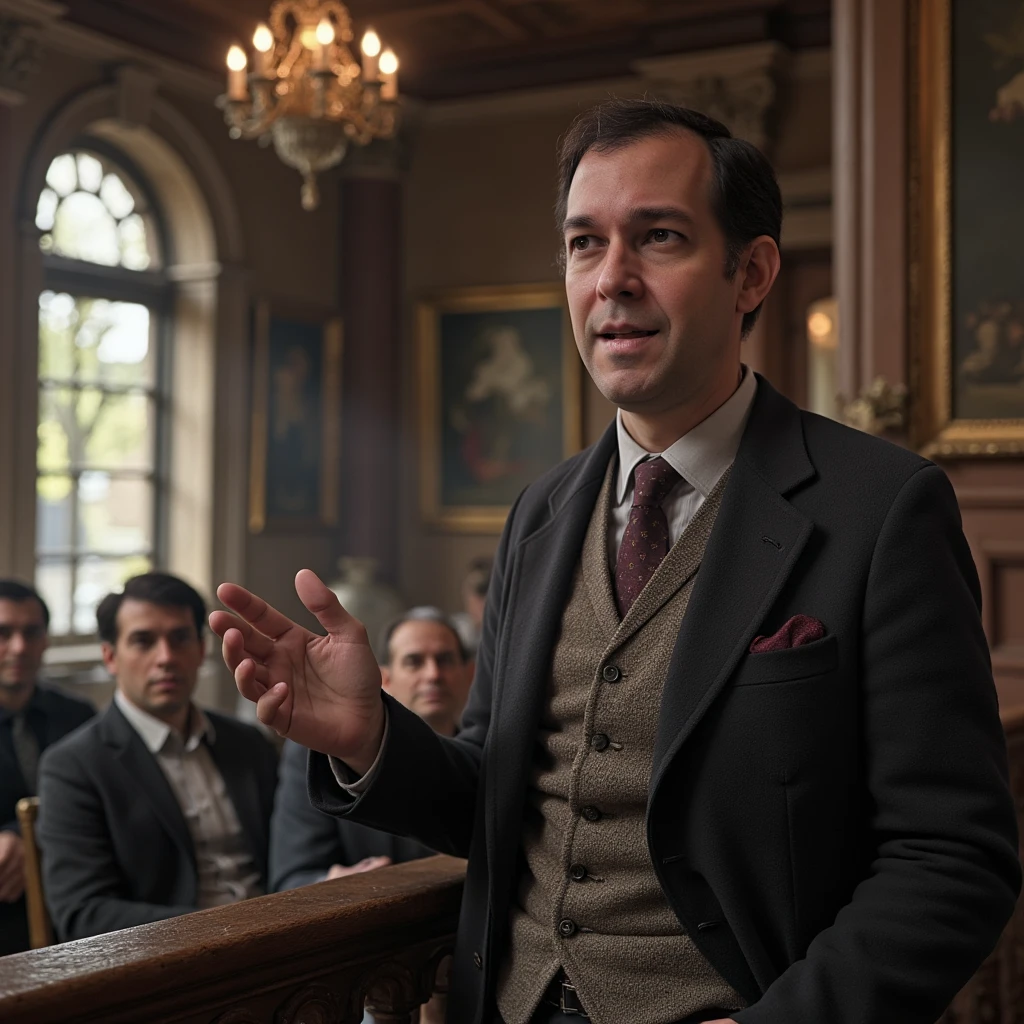

In [12]:

background = Image.open("out7.png")
background



## Describe a picture


In [15]:



replicate.run(
  "andreasjansson/blip-2:4b32258c42e9efd4288bb9910bc532a69727f9acd26aa08e175713a0a857a608",
  input={"image": res, "prompt": "what's in this picture?"}
)


'a man in a suit'


## Music


In [26]:

model = replicate.models.get("meta/musicgen")
version = model.versions.get("b05b1dff1d8c6dc63d14b0cdb42135378dcb87f6373b0d3d341ede46e59e2b38")

prediction = replicate.predictions.create(
    version=version,
    input={"prompt":"Sounds like star wars theme but with scottish tones and sounds"})


In [27]:

prediction


Prediction(id='1zknh4w4anrj20cjfb08f6a7vr', model='meta/musicgen', version='671ac645ce5e552cc63a54a2bbff63fcf798043055d2dac5fc9e36a837eedcfb', status='starting', input={'prompt': 'Sounds like star wars theme but with scottish tones and sounds'}, output=None, logs='', error=None, metrics=None, created_at='2024-10-11T08:44:50.133Z', started_at=None, completed_at=None, urls={'cancel': 'https://api.replicate.com/v1/predictions/1zknh4w4anrj20cjfb08f6a7vr/cancel', 'get': 'https://api.replicate.com/v1/predictions/1zknh4w4anrj20cjfb08f6a7vr'})

In [28]:

prediction.status


'starting'

In [29]:

prediction.wait()
prediction.reload()


In [30]:

prediction.status


'succeeded'

In [31]:

import IPython
IPython.display.Audio(prediction.output)



## Video


In [32]:

from urllib.request import urlretrieve

model = replicate.models.get("stability-ai/stable-video-diffusion")
version = model.versions.get("3f0457e4619daac51203dedb472816fd4af51f3149fa7a9e0b5ffcf1b8172438")

prediction = replicate.predictions.create(
    version=version,
    input={
      "cond_aug": 0.02,
      "decoding_t": 7,
      "input_image": "https://replicate.delivery/pbxt/JvLi9smWKKDfQpylBYosqQRfPKZPntuAziesp0VuPjidq61n/rocket.png",
      "video_length": "14_frames_with_svd",
      "sizing_strategy": "maintain_aspect_ratio",
      "motion_bucket_id": 127,
      "frames_per_second": 6
    })

prediction.wait()

urlretrieve(prediction.output, "/tmp/out.mp4")


('/tmp/out.mp4', <http.client.HTTPMessage at 0x1122a71f0>)

In [33]:

from IPython.display import Video

Video(prediction.output)


In [34]:


from urllib.request import urlretrieve

model = replicate.models.get("stability-ai/stable-video-diffusion")
version = model.versions.get("3f0457e4619daac51203dedb472816fd4af51f3149fa7a9e0b5ffcf1b8172438")

prediction = replicate.predictions.create(
    version=version,
    input={
      "cond_aug": 0.02,
      "decoding_t": 7,
      "input_image": res,
      "video_length": "14_frames_with_svd",
      "sizing_strategy": "maintain_aspect_ratio",
      "motion_bucket_id": 127,
      "frames_per_second": 6
    })

prediction.wait()

urlretrieve(prediction.output, "/tmp/out.mp4")


('/tmp/out.mp4', <http.client.HTTPMessage at 0x1123244c0>)

In [35]:

from IPython.display import Video

Video(prediction.output)
